In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# Seperate to train and test splits

In [6]:
train_data = df.iloc[:109] 
test_data = df.iloc[108:]
test_data
train_data

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1957-09-01,404
1957-10-01,347
1957-11-01,305


In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12)
fitted_model = model.fit()

In [15]:
test_predictions = fitted_model.forecast(36)

In [16]:
test_predictions

1958-02-01    339.142879
1958-03-01    399.281602
1958-04-01    394.233547
1958-05-01    402.545198
1958-06-01    473.128623
1958-07-01    521.795145
1958-08-01    514.513415
1958-09-01    446.216654
1958-10-01    385.430824
1958-11-01    339.644996
1958-12-01    381.455566
1959-01-01    401.210037
1959-02-01    387.159040
1959-03-01    455.812260
1959-04-01    450.049497
1959-05-01    459.537919
1959-06-01    540.114609
1959-07-01    595.671383
1959-08-01    587.358699
1959-09-01    509.392419
1959-10-01    440.000476
1959-11-01    387.732247
1959-12-01    435.462397
1960-01-01    458.013724
1960-02-01    441.973374
1960-03-01    520.346580
1960-04-01    513.767919
1960-05-01    524.599721
1960-06-01    616.584534
1960-07-01    680.007087
1960-08-01    670.517485
1960-09-01    581.512667
1960-10-01    502.296149
1960-11-01    442.627736
1960-12-01    497.115564
1961-01-01    522.859730
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

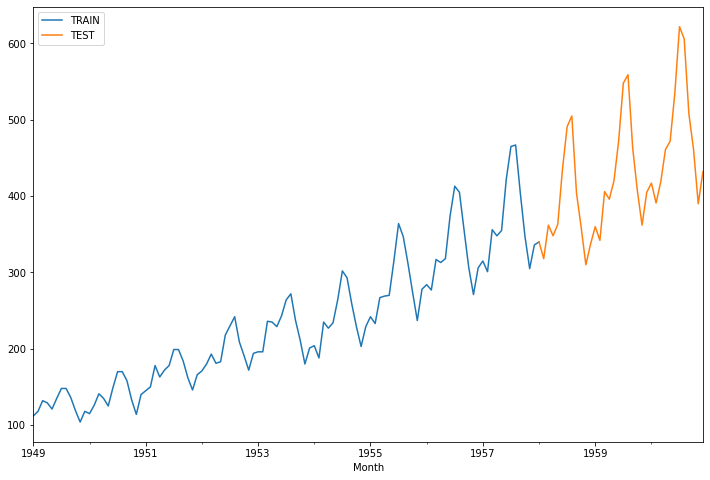

In [19]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

<AxesSubplot:xlabel='Month'>

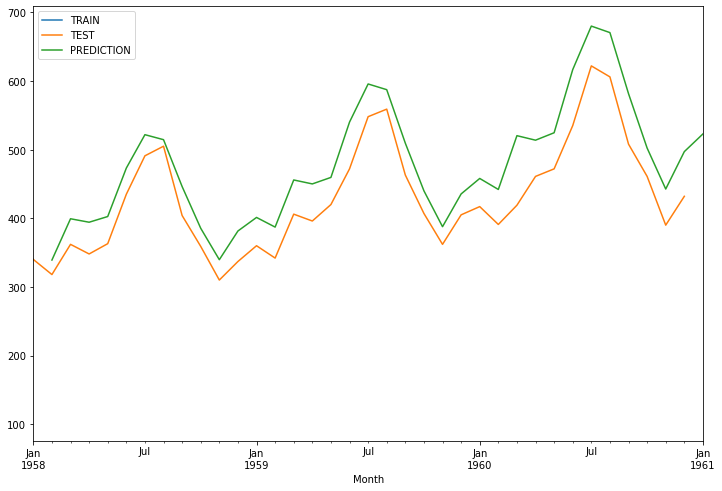

In [21]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1958-01-01', '1961-01-01'])

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(test_data, test_predictions)


63.03104468917442

In [25]:
mean_squared_error(test_data, test_predictions)

5614.235649307147

In [26]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92820329693717

In [29]:
#Forecast into the future
final_model = ExponentialSmoothing(df['Thousands of Passengers'],
                                  trend='mul', seasonal='mul',
                                  seasonal_periods=12)
fitted_final = final_model.fit()

In [31]:
forecast_predictions=fitted_final.forecast(36)

In [32]:
forecast_predictions

1961-01-01    450.675635
1961-02-01    424.818970
1961-03-01    475.495913
1961-04-01    504.076415
1961-05-01    517.872486
1961-06-01    590.146515
1961-07-01    684.227912
1961-08-01    678.031886
1961-09-01    567.112384
1961-10-01    507.824064
1961-11-01    434.719133
1961-12-01    485.980631
1962-01-01    502.746677
1962-02-01    473.902533
1962-03-01    530.434688
1962-04-01    562.317380
1962-05-01    577.707449
1962-06-01    658.332015
1962-07-01    763.283572
1962-08-01    756.371658
1962-09-01    632.636522
1962-10-01    566.498032
1962-11-01    484.946560
1962-12-01    542.130810
1963-01-01    560.834004
1963-02-01    528.657209
1963-03-01    591.721087
1963-04-01    627.287503
1963-05-01    644.455740
1963-06-01    734.395664
1963-07-01    851.473319
1963-08-01    843.762803
1963-09-01    705.731315
1963-10-01    631.951187
1963-11-01    540.977263
1963-12-01    604.768578
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

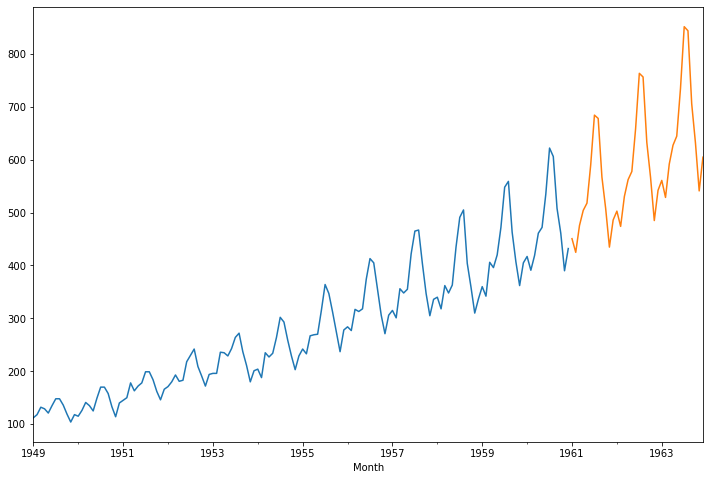

In [33]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [34]:
df2 = pd.read_csv('Data/samples.csv', index_col=0, parse_dates=True)

In [35]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<AxesSubplot:>

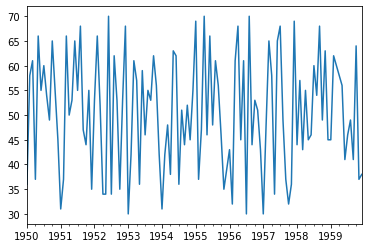

In [36]:
df2['a'].plot() #Stationary 

<AxesSubplot:>

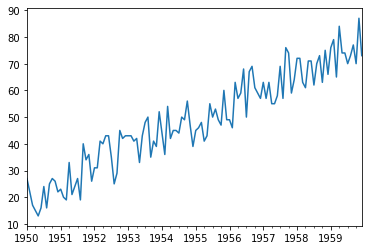

In [37]:
df2['b'].plot()

In [39]:
#Differencing non-stationary datasets
from statsmodels.tsa.statespace.tools import diff
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64